In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [15]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [16]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [17]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

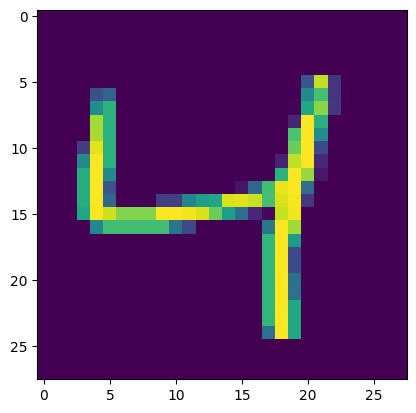

4

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])
plt.show()
y_train[2]

In [26]:
type(X_train)

numpy.ndarray

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train=X_train/255
X_test=X_test/255

In [29]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(X_train,y_train,epochs=10,batch_size=256,validation_split=0.2)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.4917 - loss: 1.6068 - val_accuracy: 0.8473 - val_loss: 0.5808
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8515 - loss: 0.5462 - val_accuracy: 0.8885 - val_loss: 0.4034
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8891 - loss: 0.3975 - val_accuracy: 0.9015 - val_loss: 0.3483
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8983 - loss: 0.3579 - val_accuracy: 0.9103 - val_loss: 0.3197
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9067 - loss: 0.3213 - val_accuracy: 0.9143 - val_loss: 0.3011
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9093 - loss: 0.3154 - val_accuracy: 0.9190 - val_loss: 0.2895
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9171 - loss: 0.2945 - val_accuracy: 0.9211 - val_loss: 0.2824
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9195 - loss: 0.2850 - val_ac

In [37]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[8.5217318e-05, 1.0125357e-08, 1.5681415e-04, ..., 9.9408865e-01,
        1.5713291e-05, 8.9174253e-04],
       [4.2253039e-05, 1.3350395e-05, 9.9895453e-01, ..., 2.4646112e-11,
        1.2036729e-05, 4.5736218e-14],
       [2.7363163e-05, 9.7974819e-01, 9.3564652e-03, ..., 1.9350445e-03,
        3.5737832e-03, 2.0847183e-04],
       ...,
       [1.0799613e-05, 2.2415281e-06, 1.0149187e-05, ..., 4.9291990e-05,
        2.2789203e-03, 7.3152646e-02],
       [1.2856594e-05, 4.2753973e-06, 1.3207121e-07, ..., 5.4922360e-09,
        5.3169923e-03, 5.1252762e-05],
       [5.0666285e-06, 1.2296615e-10, 6.1386177e-06, ..., 1.8027787e-08,
        1.2162232e-07, 2.5771250e-09]], dtype=float32)

In [39]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
y_prd=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [42]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_prd)
acc

0.9222

In [44]:
import seaborn as sns

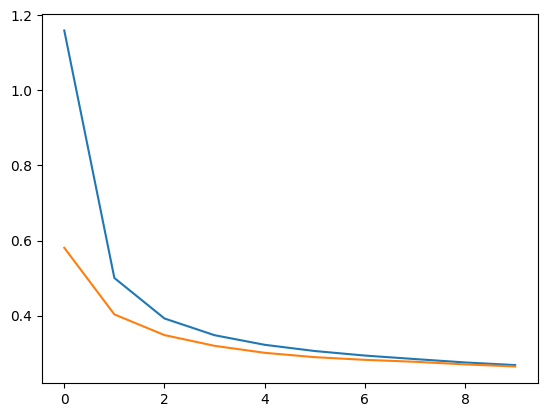

In [46]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
plt.show()

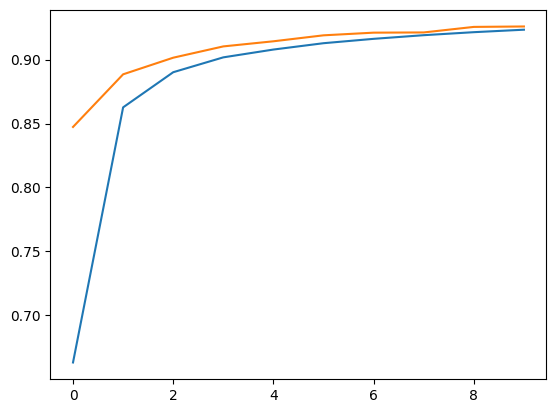

In [47]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])
plt.show()

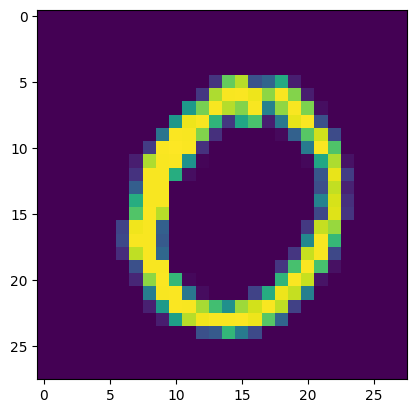

In [50]:
plt.imshow(X_test[101])

In [53]:
model.predict(X_test[101].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


array([0], dtype=int64)

In [54]:
X_test[101].shape

(28, 28)

In [55]:
X_test.shape

(10000, 28, 28)